<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/Principal_Component_Analysis_and_Diagnosis_of_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and diagnosis of Metabolic Syndrome using binary classification**

**Install Pycaret**

In [100]:
!pip install pycaret==2.3.6 #pycaret installation


  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Import Libraries**

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [102]:
print("Pandas version: ", pd.__version__) #checking version
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [103]:
#from google.colab import files

#uploaded = files.upload()

**Dataset**

The “Metabolic Syndrome dataset” used for Principle Component Analysis (PCA) and binary classification is obtained from Kaggle. The data set provided information about attributes that potentially impact a person with metabollic syndrome and use it for prediction of the disease.  
There are 14 attributes with 2401 entries and one column for classification.
**0 represents not_diagnosed and 1 represents diagnosed.**


All attributes are numerical and they are listed bellow:

1. seqn
2. Age
3. Sex
4. Marital
5. Income
6. Race
7. WaistCirc
8. BMI
9. Albuminuria
10. UrAlbCr
11. UricAcid
12. BloodGlucose
13. HDL
14. Triglycerides

Few of the data attributes will be dropped due to being irrelevant for binary classification task.

The 15th data column is the outcome which is Metabolic Syndrome.

The original dataset can be found on below link:
https://www.kaggle.com/datasets/antimoni/metabolic-syndrome/data





In [104]:
#read cvs file into dataframe
df = pd.read_csv('/content/Metabolic Syndrome.csv')

In [105]:
len(df.index)

2401

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [107]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [108]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  392


In [109]:
df.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [110]:
a = df.dropna() #dropping values containing NaN
len(a.index)

2009

In [111]:
print("Number of duplicated rows is: ", a.duplicated().sum())
print("Number of rows with NaNs is: ", a.isna().any(axis=1).sum())

Number of duplicated rows is:  0
Number of rows with NaNs is:  0


In [112]:
B = a.drop('seqn', axis=1)
C = B.drop('Race', axis=1)
D = C.drop('Sex', axis=1)
A = D.drop('Marital', axis=1) #doesn't contain any information relevant to the binary classification task and thereby, the columns are dropped
A.head(25)

Age  Income  WaistCirc   BMI  Albuminuria  UrAlbCr  UricAcid  \
0    22  8200.0       81.0  23.3            0     3.88       4.9   
1    44  4500.0       80.1  23.2            0     8.55       4.5   
2    21   800.0       69.6  20.1            0     5.07       5.4   
3    43  2000.0      120.4  33.3            0     5.22       5.0   
5    80   300.0      112.5  28.5            0     9.79       4.8   
6    26  9000.0       78.6  22.1            0     9.21       5.4   
7    30  6200.0       80.2  22.4            0     8.78       6.7   
11   36  8200.0       97.0  24.7            1    62.14       6.7   
12   28  9000.0      106.0  28.9            0     7.24       8.8   
13   38  3500.0       82.7  22.2            0     5.53       4.5   
14   62  2500.0       92.9  26.0            0     2.33       3.6   
15   22  3500.0       89.0  23.8            0    21.43       4.8   
16   65  1500.0       94.0  26.7            0     8.38       3.9   
17   77  1600.0      118.6  30.6            1   187.41       4.2   
18   38  8200.0      120.3  45.4            0    16.63       5.6   
19   29  5400.0       90.1  27.2            0     7.39       4.5   
20   80  5400.0       97.2  28.4            0     6.94       4.2   
21   50  8200.0      136.1  43.4            0     4.71       6.5   
22   48  9000.0      111.0  33.2            0     4.84       5.7   
23   61  9000.0       90.8  23.2            0     2.34       5.3   
25   65  4500.0      104.2  26.6            1    31.46       6.3   
26   34  9000.0       95.1  25.9            0     5.89       5.0   
27   77  3500.0      112.0  31.1            0    25.97       6.4   
28   52  3500.0      110.0  31.4            1   120.73       4.1   
29   64  2000.0       74.6  16.6            1   172.13       6.7   

    BloodGlucose  HDL  Triglycerides  MetabolicSyndrome  
0             92   41             84                  0  
1             82   28             56                  0  
2            107   43             78                  0  
3            104   73            141                  0  
5            105   47            100                  0  
6             87   61             40                  0  
7             83   48             91                  0  
11            94   58            182                  0  
12           101   40            129                  1  
13            91   46             62                  0  
14           138   31            565                  1  
15            90   54             44                  0  
16           161   52             79                  1  
17           178   46            107                  1  
18           102   36            162                  1  
19            84   56            121                  0  
20           111   37            105                  0  
21           204   33            192                  1  
22            99   59            122                  0  
23           102   39            135                  1  
25           106   30            326                  1  
26           101   50             98                  0  
27           130   55            138                  1  
28           258   39            223                  1  
29            92   56             91                  0

**Exploratory Data Analysis**

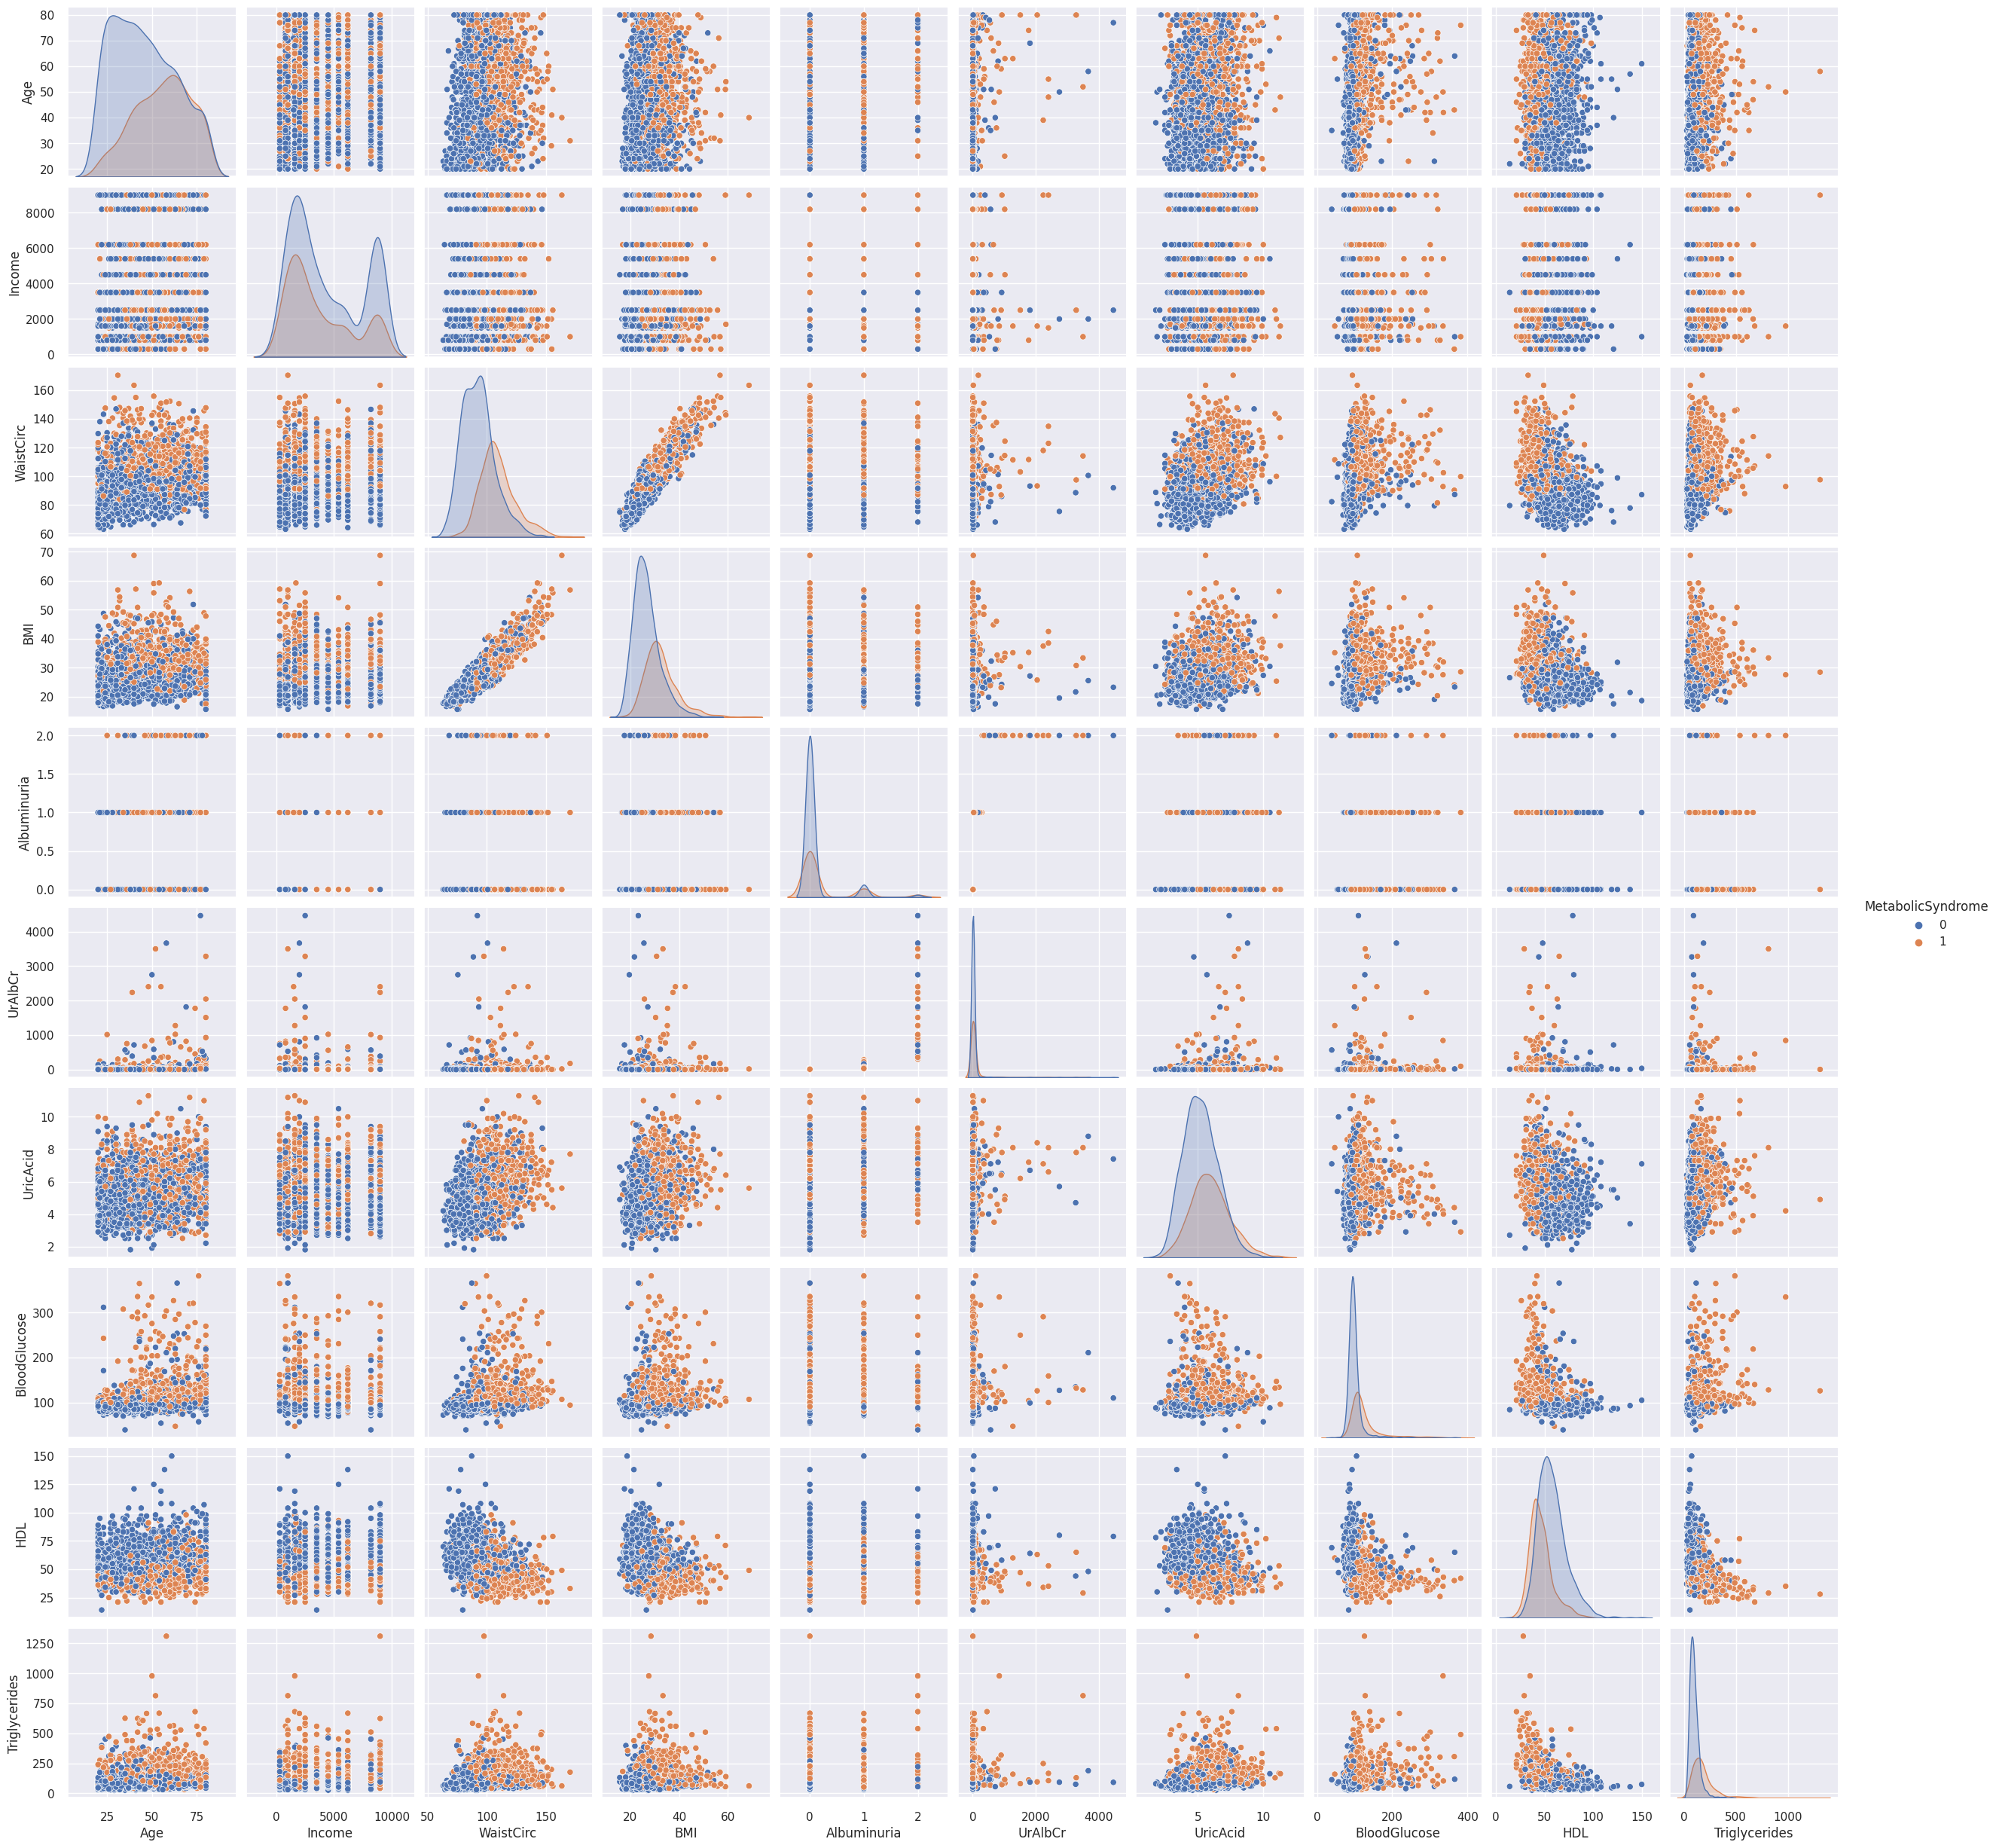

In [113]:
sns.pairplot(A, hue='MetabolicSyndrome')
plt.show()

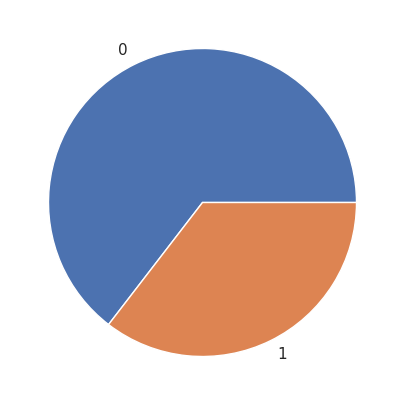

In [114]:
y =A['MetabolicSyndrome']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [115]:
X = A.drop(columns=['MetabolicSyndrome'])
X.head(10)

Age  Income  WaistCirc   BMI  Albuminuria  UrAlbCr  UricAcid  \
0    22  8200.0       81.0  23.3            0     3.88       4.9   
1    44  4500.0       80.1  23.2            0     8.55       4.5   
2    21   800.0       69.6  20.1            0     5.07       5.4   
3    43  2000.0      120.4  33.3            0     5.22       5.0   
5    80   300.0      112.5  28.5            0     9.79       4.8   
6    26  9000.0       78.6  22.1            0     9.21       5.4   
7    30  6200.0       80.2  22.4            0     8.78       6.7   
11   36  8200.0       97.0  24.7            1    62.14       6.7   
12   28  9000.0      106.0  28.9            0     7.24       8.8   
13   38  3500.0       82.7  22.2            0     5.53       4.5   

    BloodGlucose  HDL  Triglycerides  
0             92   41             84  
1             82   28             56  
2            107   43             78  
3            104   73            141  
5            105   47            100  
6             87   61             40  
7             83   48             91  
11            94   58            182  
12           101   40            129  
13            91   46             62

In [116]:
X.describe().transpose()

count         mean          std    min      25%      50%  \
Age            2009.0    49.263813    17.421740   20.0    35.00    49.00   
Income         2009.0  4147.187656  2984.597463  300.0  1600.00  3500.00   
WaistCirc      2009.0    98.524141    16.306348   63.1    86.90    97.10   
BMI            2009.0    28.733499     6.580322   15.7    24.10    27.70   
Albuminuria    2009.0     0.147337     0.416533    0.0     0.00     0.00   
UrAlbCr        2009.0    42.253375   241.419903    1.4     4.46     6.96   
UricAcid       2009.0     5.491488     1.428865    1.8     4.50     5.40   
BloodGlucose   2009.0   108.008462    33.636746   39.0    92.00   100.00   
HDL            2009.0    53.551020    15.012329   14.0    43.00    51.00   
Triglycerides  2009.0   126.892982    89.818470   26.0    75.00   103.00   

                   75%      max  
Age              63.00    80.00  
Income         6200.00  9000.00  
WaistCirc       107.80   170.50  
BMI              32.10    68.70  
Albuminuria       0.00     2.00  
UrAlbCr          13.49  4462.81  
UricAcid          6.40    11.30  
BloodGlucose    110.00   382.00  
HDL              62.00   150.00  
Triglycerides   149.00  1311.00

**Standardize the Data**

In [117]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Age    Income  WaistCirc       BMI  Albuminuria   UrAlbCr  UricAcid  \
0 -1.565320  1.358247  -1.074950 -0.825925    -0.353810 -0.158988 -0.414060   
1 -0.302216  0.118240  -1.130157 -0.841126    -0.353810 -0.139640 -0.694072   
2 -1.622734 -1.121766  -1.774238 -1.312344    -0.353810 -0.154058 -0.064045   
3 -0.359630 -0.719602   1.341889  0.694136    -0.353810 -0.153436 -0.344057   
4  1.764683 -1.289335   0.857294 -0.035493    -0.353810 -0.134502 -0.484063   
5 -1.335665  1.626357  -1.222168 -1.008332    -0.353810 -0.136905 -0.064045   
6 -1.106009  0.687973  -1.124023 -0.962730    -0.353810 -0.138687  0.845995   
7 -0.761526  1.358247  -0.093492 -0.613116     2.047555  0.082394  0.845995   
8 -1.220837  1.626357   0.458577  0.025309    -0.353810 -0.145067  2.316059   
9 -0.646699 -0.216897  -0.970670 -0.993132    -0.353810 -0.152152 -0.694072   

   BloodGlucose       HDL  Triglycerides  
0     -0.476040 -0.836256      -0.477671  
1     -0.773408 -1.702426      -0.789488  
2     -0.029988 -0.702999      -0.544489  
3     -0.119199  1.295856       0.157101  
4     -0.089462 -0.436485      -0.299489  
5     -0.624724  0.496314      -0.967670  
6     -0.743671 -0.369856      -0.399716  
7     -0.416567  0.296429       0.613690  
8     -0.208409 -0.902884       0.023464  
9     -0.505777 -0.503113      -0.722670

In [118]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Age            2009.0 -1.697663e-16  1.000249 -1.680148 -0.818940 -0.015147   
Income         2009.0  2.829438e-17  1.000249 -1.289335 -0.853657 -0.216897   
WaistCirc      2009.0  4.173422e-16  1.000249 -2.172955 -0.713037 -0.087358   
BMI            2009.0 -5.782665e-16  1.000249 -1.981171 -0.704320 -0.157098   
Albuminuria    2009.0  5.835717e-17  1.000249 -0.353810 -0.353810 -0.353810   
UrAlbCr        2009.0  7.073596e-18  1.000249 -0.169263 -0.156585 -0.146227   
UricAcid       2009.0  1.007987e-16  1.000249 -2.584154 -0.694072 -0.064045   
BloodGlucose   2009.0 -1.520823e-16  1.000249 -2.052090 -0.476040 -0.238146   
HDL            2009.0 -1.697663e-16  1.000249 -2.635225 -0.702999 -0.169971   
Triglycerides  2009.0 -7.073596e-18  1.000249 -1.123578 -0.577898 -0.266080   

                    75%        max  
Age            0.788647   1.764683  
Income         0.687973   1.626357  
WaistCirc      0.568991   4.415077  
BMI            0.511729   6.075151  
Albuminuria   -0.353810   4.448921  
UrAlbCr       -0.119172  18.315214  
UricAcid       0.635986   4.066134  
BloodGlucose   0.059222   8.147630  
HDL            0.562943   6.426251  
Triglycerides  0.246191  13.186618

**Observations and variables**

In [119]:
observations = list(A.index)
variables = list(A.columns)

**Box and Whisker Plots**

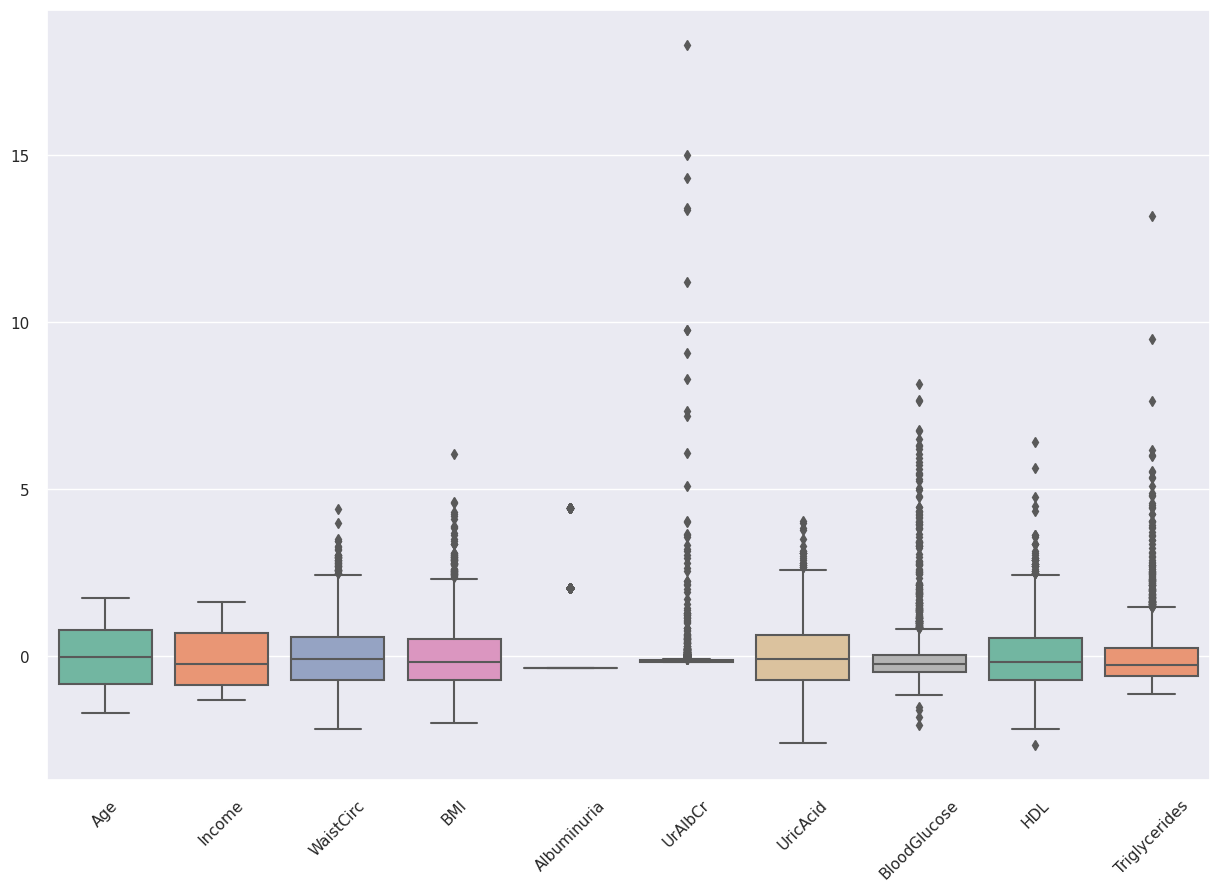

In [120]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

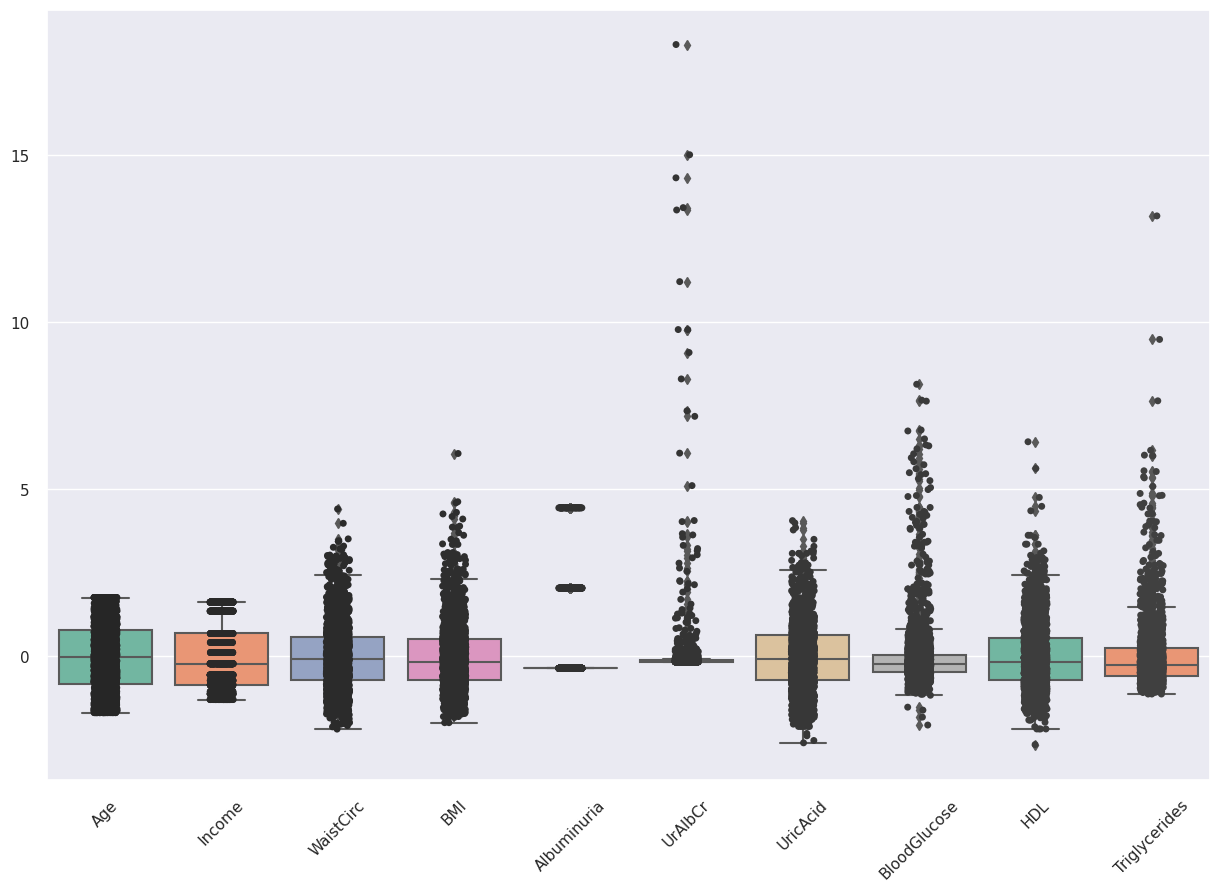

In [121]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

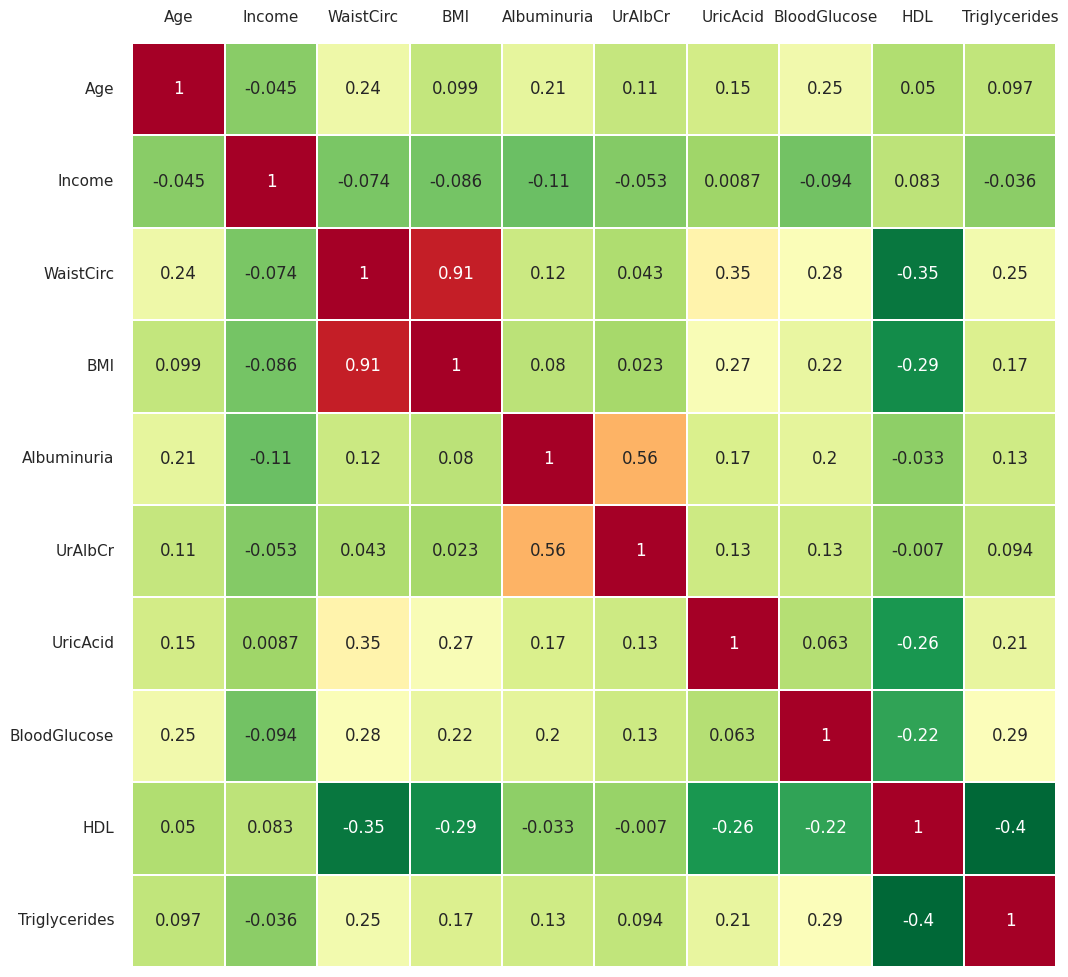

In [122]:
fig1,ax1 = plt.subplots(figsize=(15,12))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

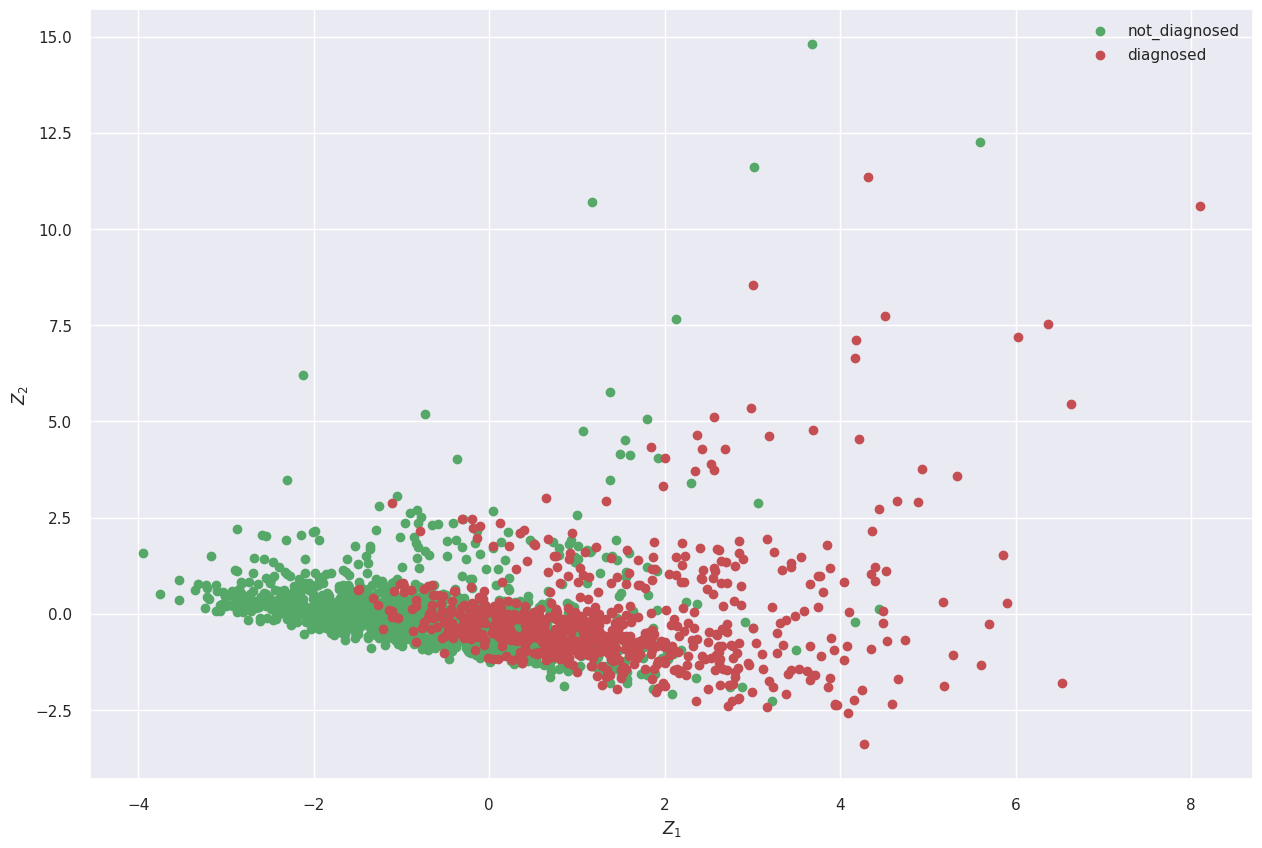

In [123]:
pca = PCA()
Z = pca.fit_transform(X)

# (diagnosed)->1,  (not_diagnosed)->0

idx_not_diagnosed= np.where(y == 0)
idx_diagnosed = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_not_diagnosed,0], Z[idx_not_diagnosed,1], c='g', label='not_diagnosed')
plt.scatter(Z[idx_diagnosed,0], Z[idx_diagnosed,1], c='r', label='diagnosed')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 0.20860245,  0.23957012, -0.37501149,  0.31855039,  0.51580404,
        -0.42427561,  0.25519945, -0.35240773,  0.10069534,  0.10706115],
       [-0.10354896, -0.09655001, -0.03147931, -0.57287634,  0.69157909,
         0.39830114, -0.00977869, -0.09870644, -0.06157132,  0.01491351],
       [ 0.50300196, -0.25194143, -0.32423691, -0.04382681, -0.07526459,
         0.14767002,  0.12506861,  0.01575417,  0.01061547, -0.73006161],
       [ 0.45515321, -0.29207004, -0.35713408, -0.06587144, -0.1925053 ,
         0.25870172,  0.11685296,  0.08749585,  0.00300171,  0.67107588],
       [ 0.23182018,  0.59786777, -0.02259762, -0.14277192, -0.13485031,
         0.10468628,  0.04124751, -0.06285805, -0.73014931,  0.00217605],
       [ 0.16848477,  0.60059811,  0.02626392, -0.26920946, -0.18512171,
         0.21537037,  0.05616686, -0.06301205,  0.67075729, -0.00602038],
       [ 0.31559695, -0.01757163,  0.01461736, -0.47042293,  0.05392855,
        -0.63226596, -0.44706294,  0.27115575

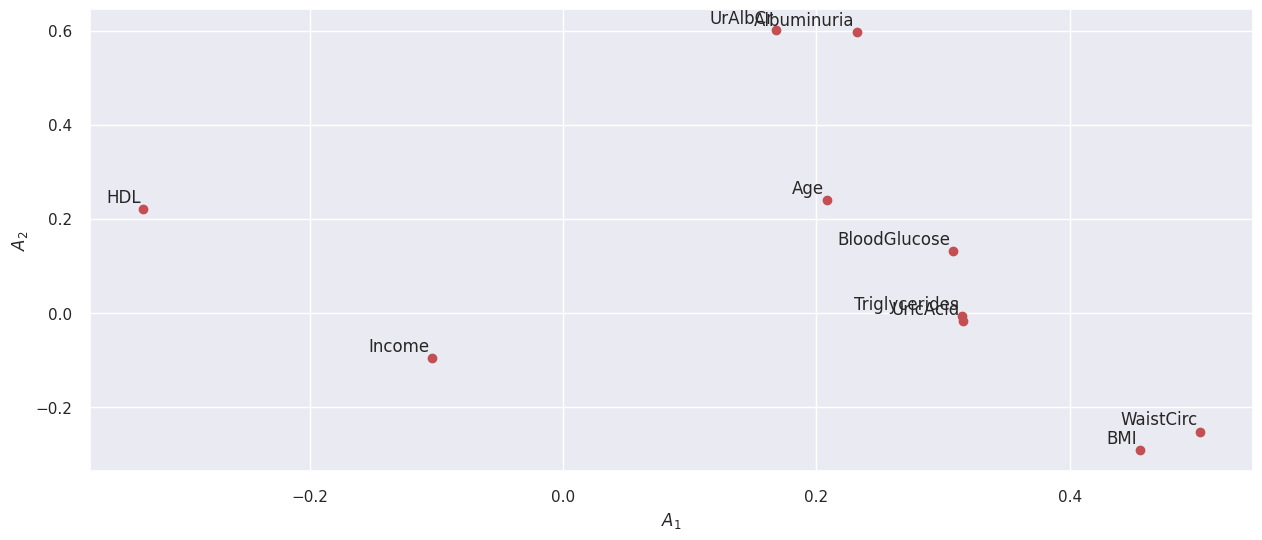

In [124]:
A = pca.components_.T
plt. figure(figsize=(15,6))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

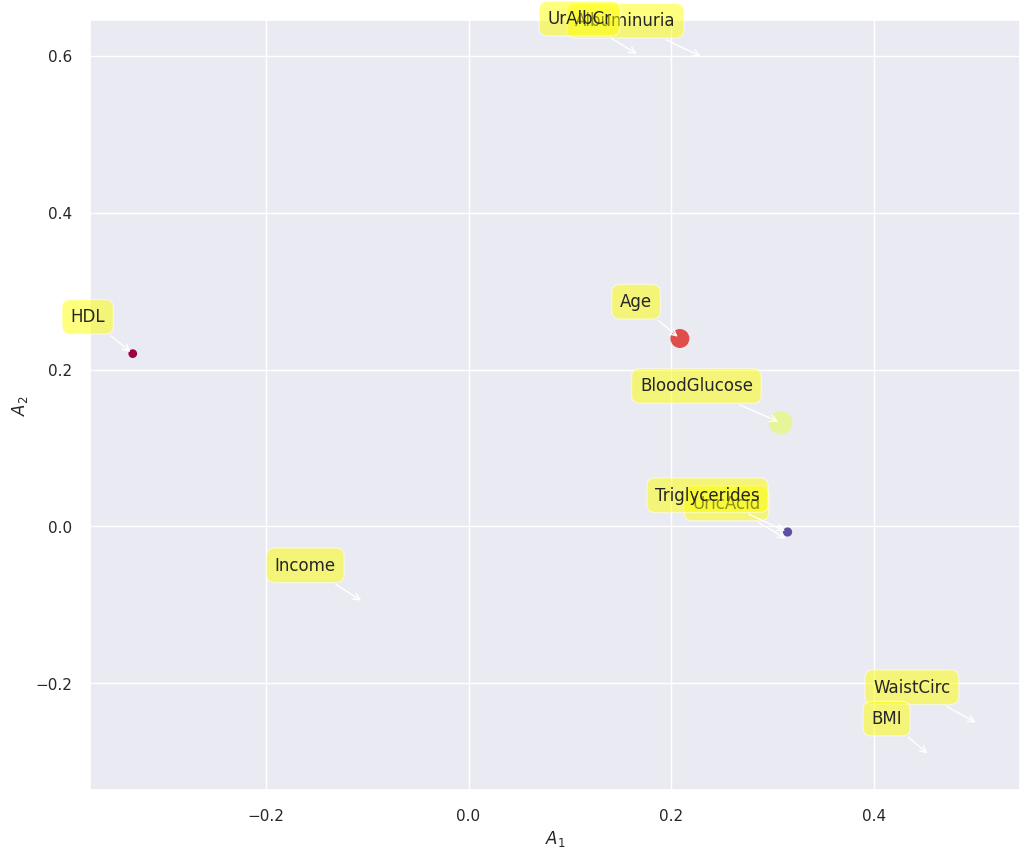

In [125]:
plt. figure(figsize=(12,10))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([2.78982965, 1.60527423, 1.12800551, 1.04193388, 0.99268773,
       0.82520757, 0.59521737, 0.53198608, 0.4215716 , 0.07326645])

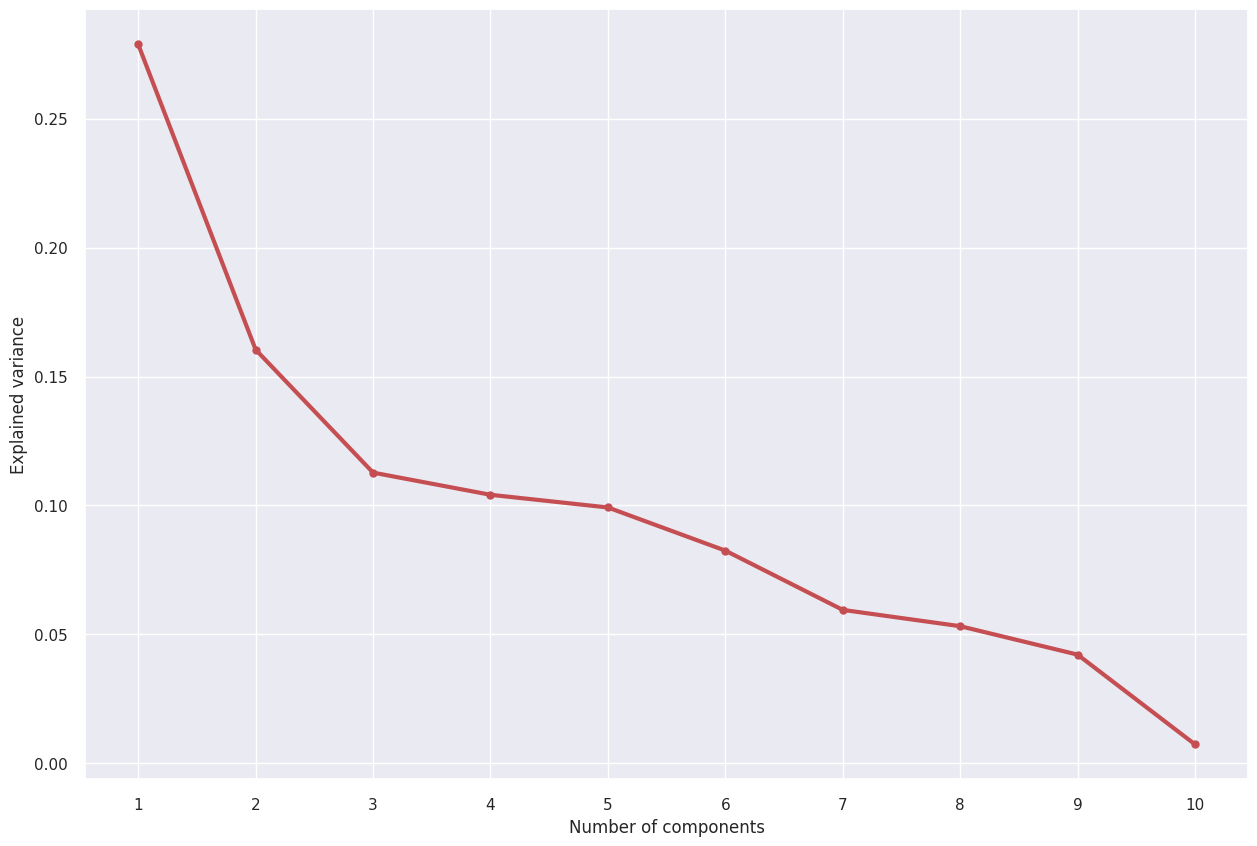

In [126]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

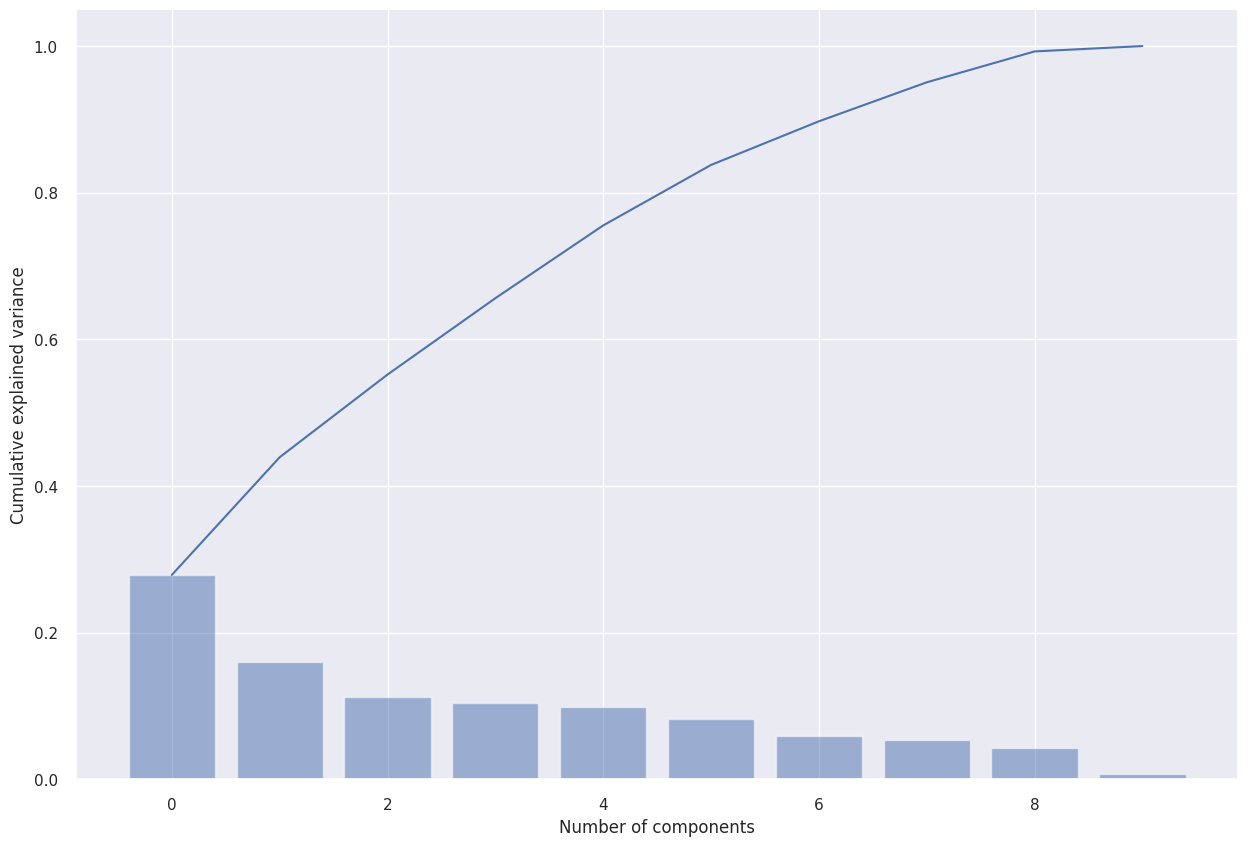

In [127]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-0.53749635, -0.30811642,  0.09203478, ..., -0.69550249,
       -1.20661797, -0.60235591])

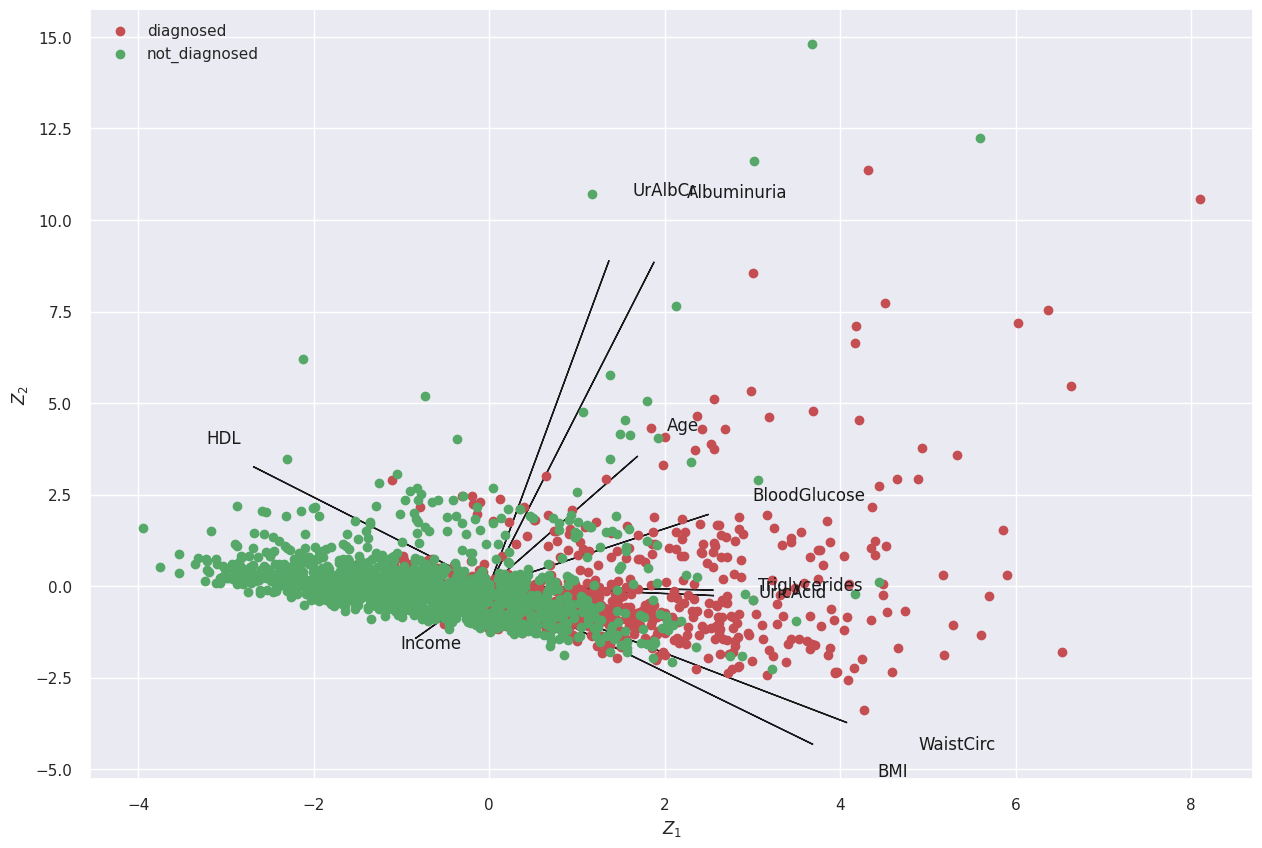

In [128]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_diagnosed,0], Z[idx_diagnosed,1], c='r', label='diagnosed')
plt.scatter(Z[idx_not_diagnosed,0], Z[idx_not_diagnosed,1], c='g', label='not_diagnosed')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [129]:
!pip install pca

In [130]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [131]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.643204 -0.537496  1.281976 -1.197844  0.088378  0.872017 -0.541546   
1    -1.273861 -0.308116  1.099205 -0.169122 -0.377259 -0.090534 -0.169542   
2    -1.788017  0.092035  1.740008  0.324378 -1.356389 -0.384711 -1.130642   
3     0.357264 -0.586590 -1.129279  0.469537 -0.734489  0.373109  0.589400   
4     0.682028 -0.047983 -0.845977  1.493038 -0.131476 -0.927691  0.603377   
...        ...       ...       ...       ...       ...       ...       ...   
2004 -1.834914  0.321536  0.644555 -0.357061 -0.615721 -1.007754 -0.971999   
2005  0.638677 -0.217442  0.056150 -0.168265  0.981050 -0.767180 -0.067582   
2006 -0.063504 -0.695502  0.338633 -0.083841 -1.565574 -0.340007 -0.663198   
2007  0.260986 -1.206618  0.533598 -1.538654  0.108515  0.775155 -0.434671   
2008  0.633466 -0.602356  0.833847 -0.272858  0.833473 -0.158060  1.066735   

           PC8  
0    -0.671590  
1    -1.907509  
2    -0.210729  
3     1.219387  
4    -1.056415  
...        ...  
2004  0.765585  
2005 -0.090424  
2006  0.133855  
2007 -0.151325  
2008 -0.788823  

[2009 rows x 8 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '8 Principal Components explain [99.26%] of the variance'}, xlabel='PC1 (27.8% expl.var)', ylabel='PC2 (16.0% expl.var)'>)

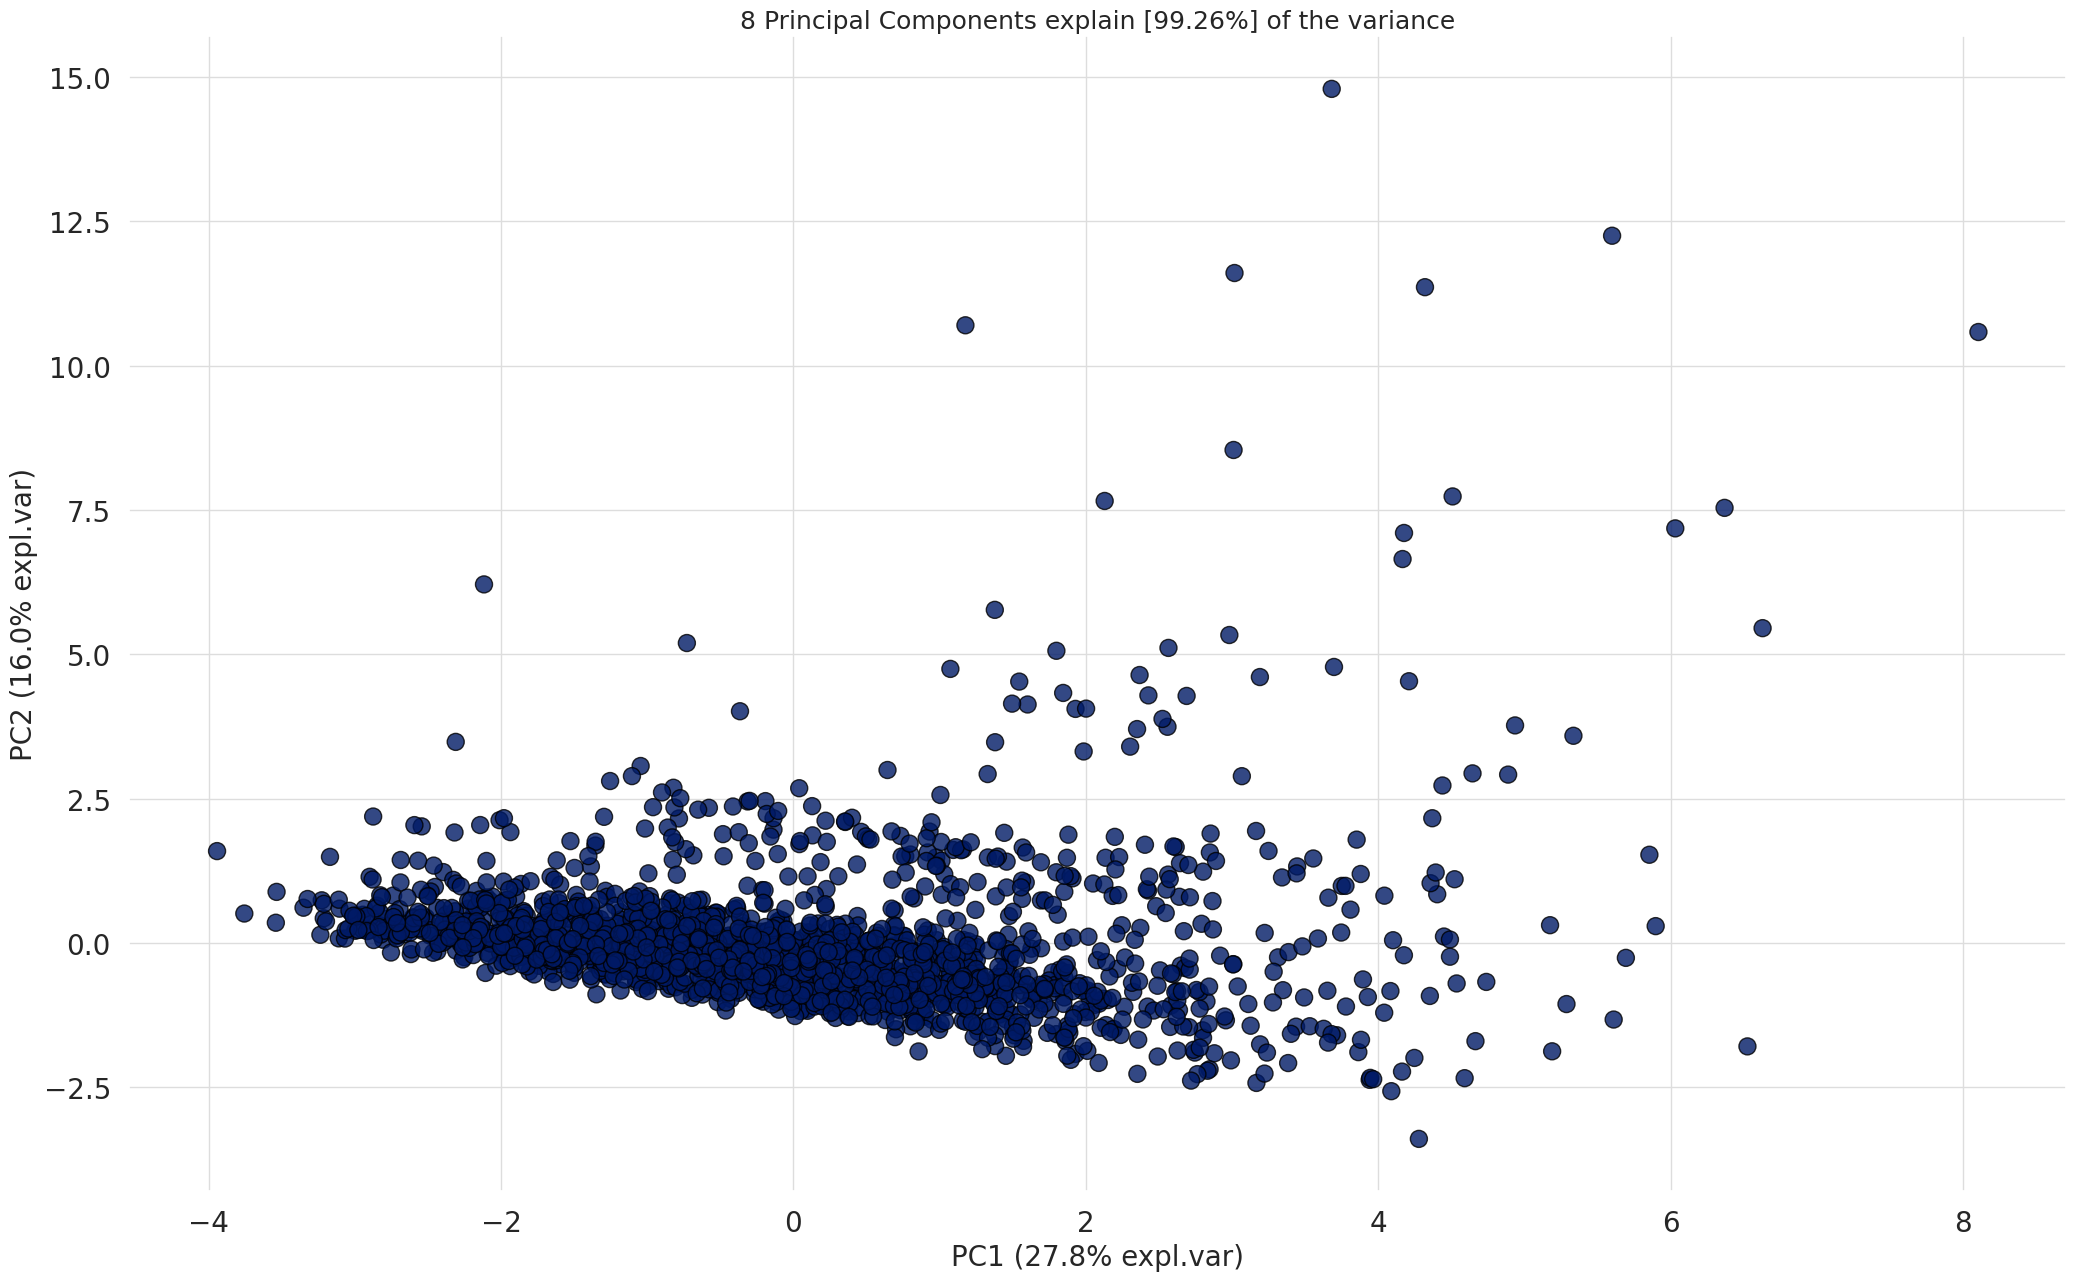

In [132]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [133]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4       PC5       PC6  \
Age            0.208602  0.239570 -0.375011  0.318550  0.515804 -0.424276   
Income        -0.103549 -0.096550 -0.031479 -0.572876  0.691579  0.398301   
WaistCirc      0.503002 -0.251941 -0.324237 -0.043827 -0.075265  0.147670   
BMI            0.455153 -0.292070 -0.357134 -0.065871 -0.192505  0.258702   
Albuminuria    0.231820  0.597868 -0.022598 -0.142772 -0.134850  0.104686   
UrAlbCr        0.168485  0.600598  0.026264 -0.269209 -0.185122  0.215370   
UricAcid       0.315597 -0.017572  0.014617 -0.470423  0.053929 -0.632266   
BloodGlucose   0.308046  0.132155  0.136525  0.492917  0.309371  0.334020   
HDL           -0.331390  0.220261 -0.522495  0.055301  0.097754  0.023846   
Triglycerides  0.314875 -0.007210  0.576755  0.062436  0.228719 -0.058067   

                    PC7       PC8  
Age            0.255199 -0.352408  
Income        -0.009779 -0.098706  
WaistCirc      0.125069  0.015754  
BMI            0.116853  0.087496  
Albuminuria    0.041248 -0.062858  
UrAlbCr        0.056167 -0.063012  
UricAcid      -0.447063  0.271156  
BloodGlucose  -0.615790  0.193461  
HDL            0.103093  0.736587  
Triglycerides  0.557615  0.443539

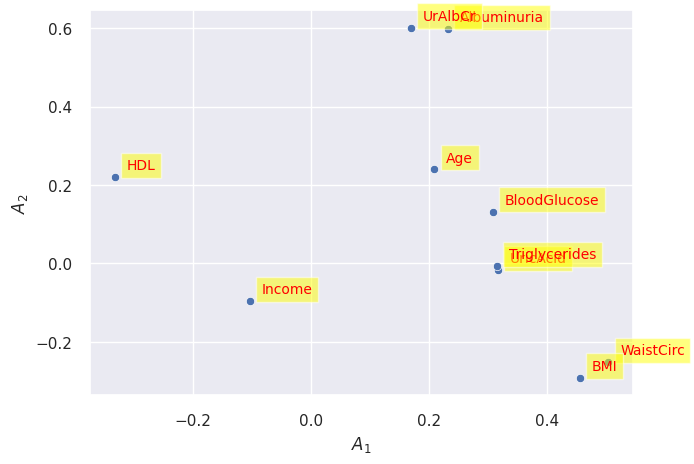

In [134]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


**Scree Plot**

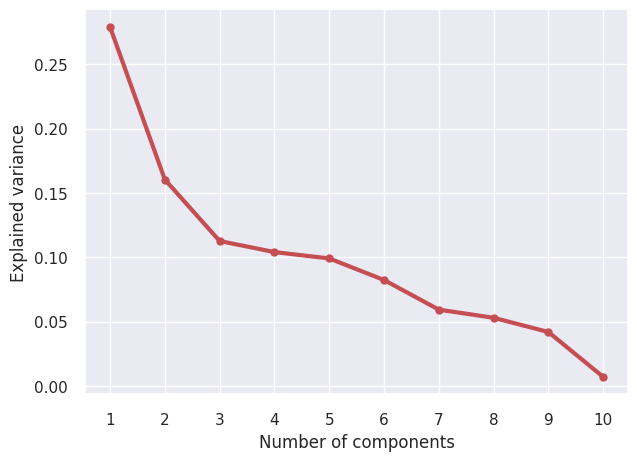

In [135]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

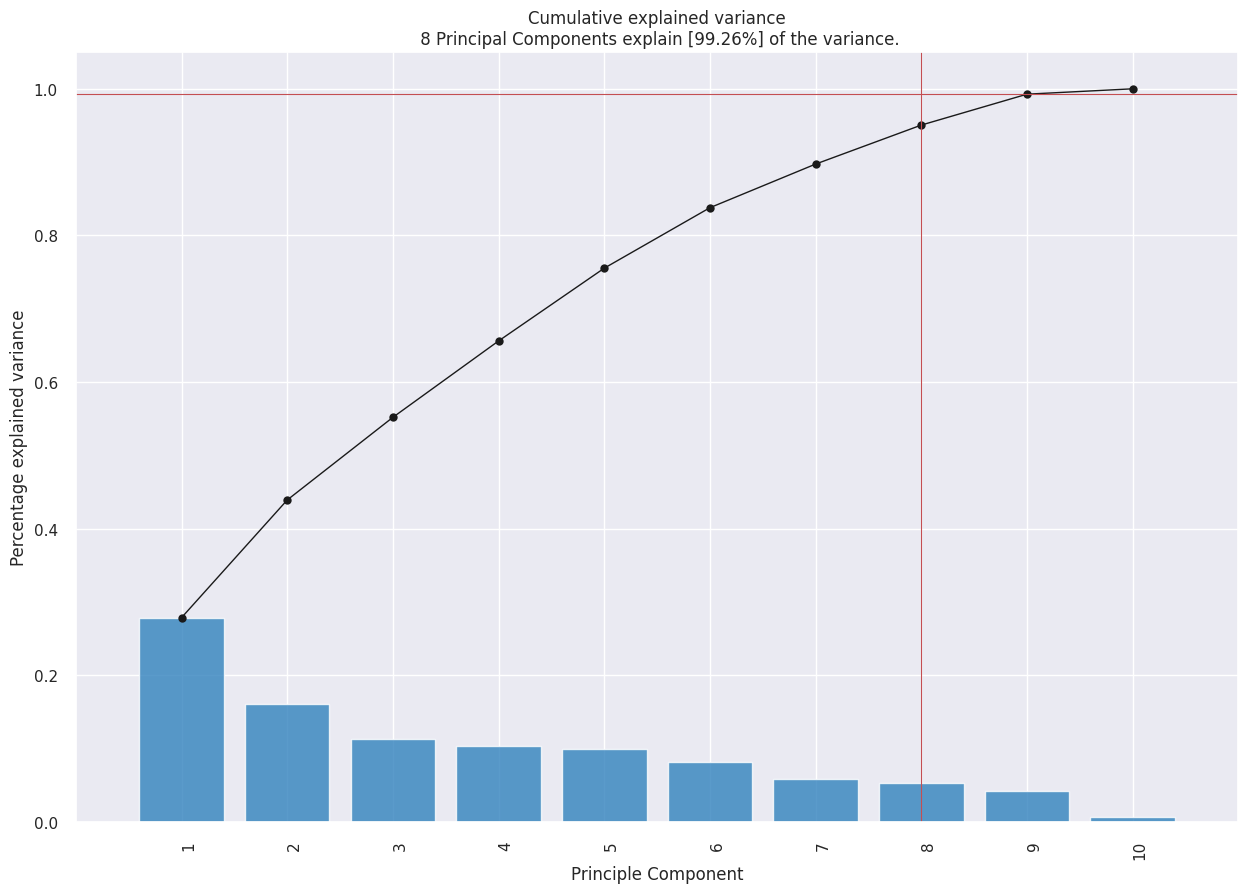

In [136]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '8 Principal Components explain [99.26%] of the variance'}, xlabel='PC1 (27.8% expl.var)', ylabel='PC2 (16.0% expl.var)'>)

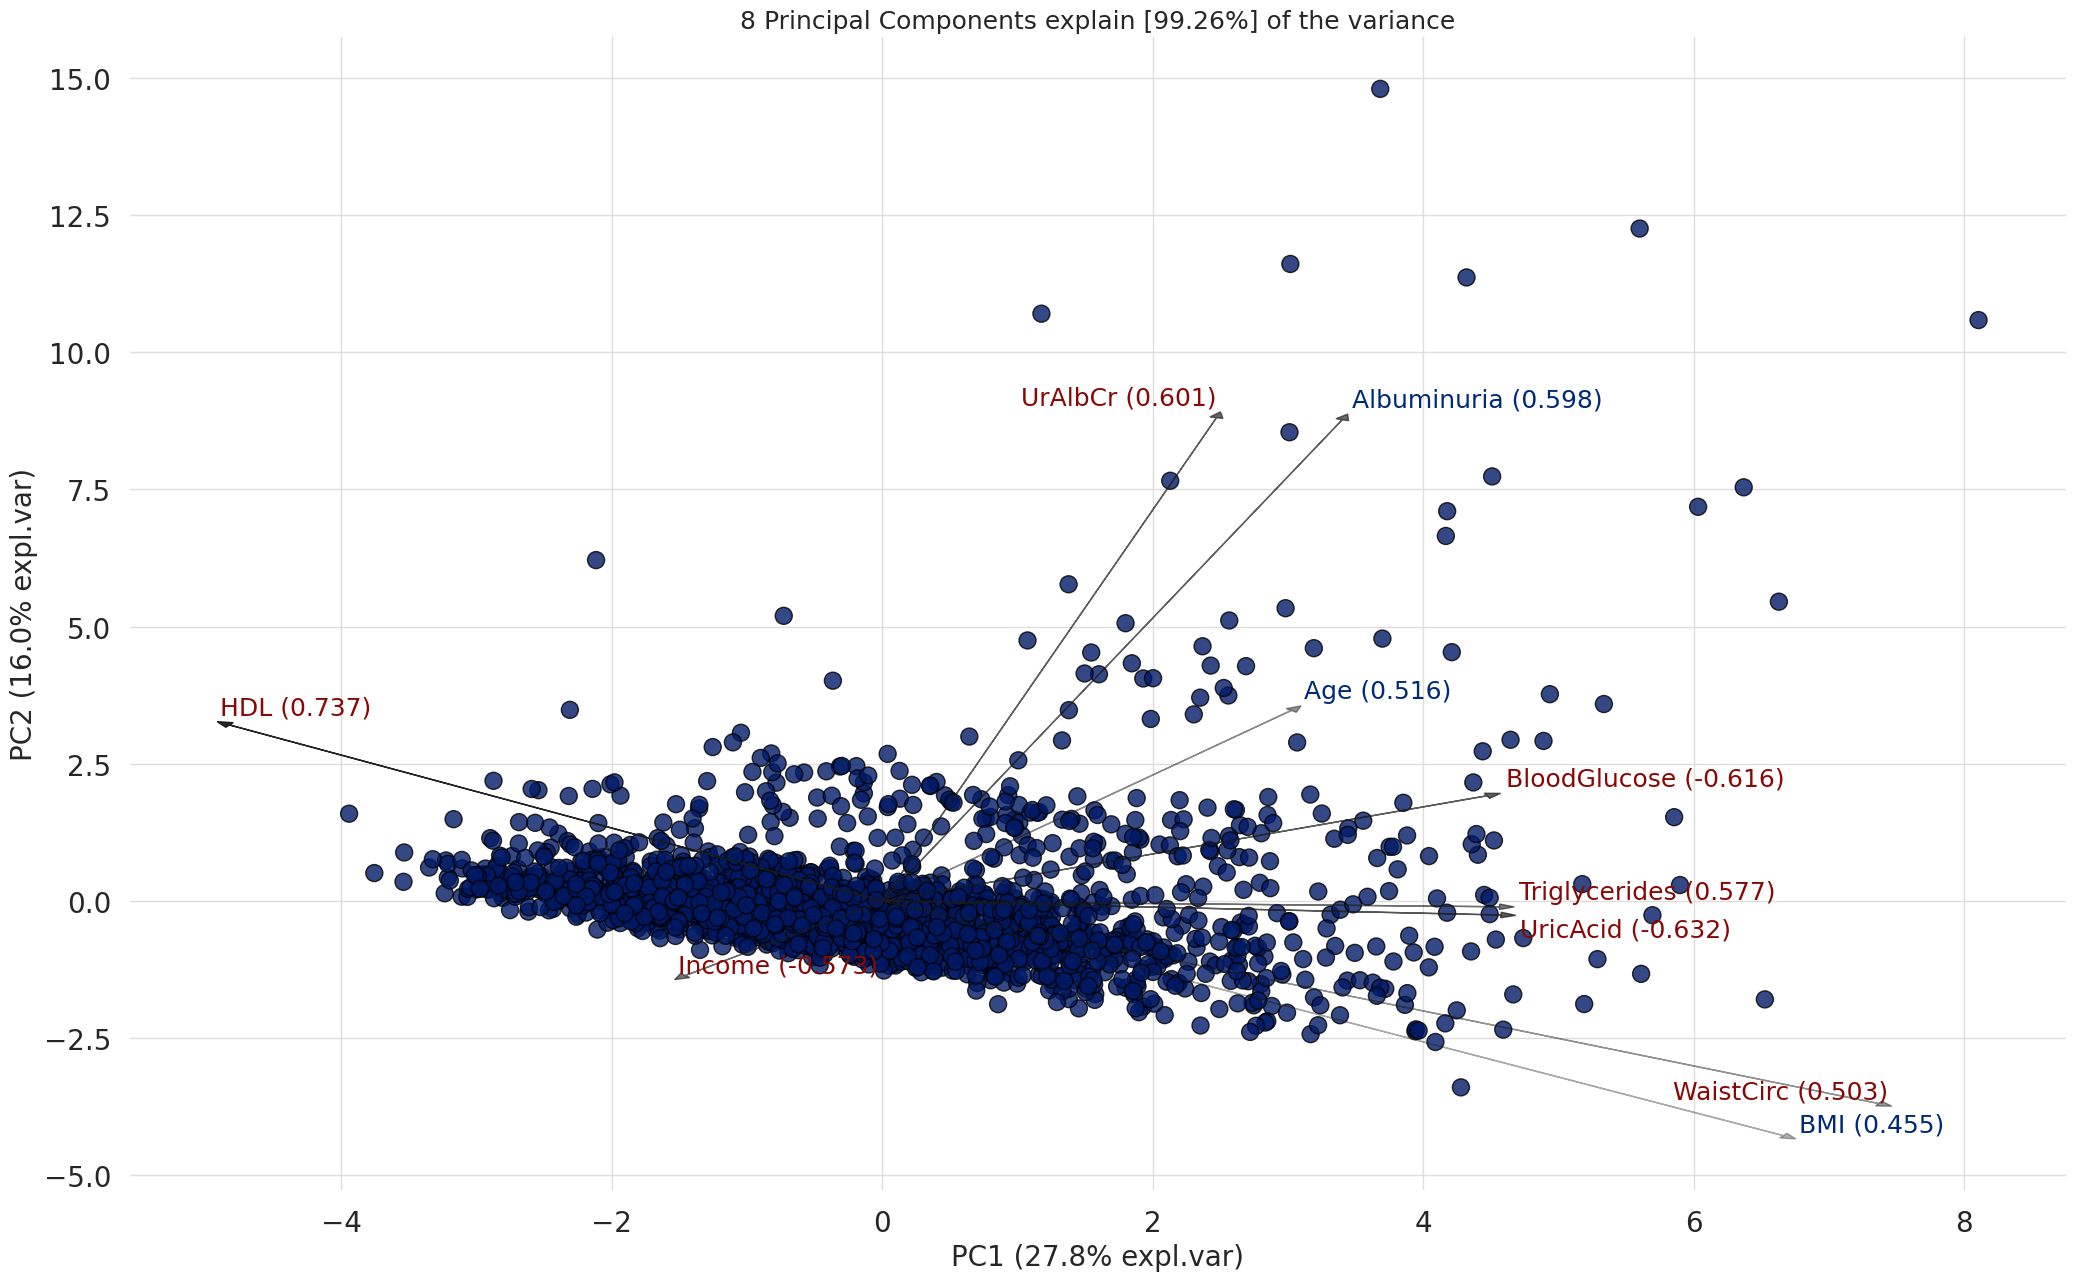

In [137]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '8 Principal Components explain [99.26%] of the variance'}, xlabel='PC1 (27.8% expl.var)', ylabel='PC2 (16.0% expl.var)', zlabel='PC3 (11.2% expl.var)'>)

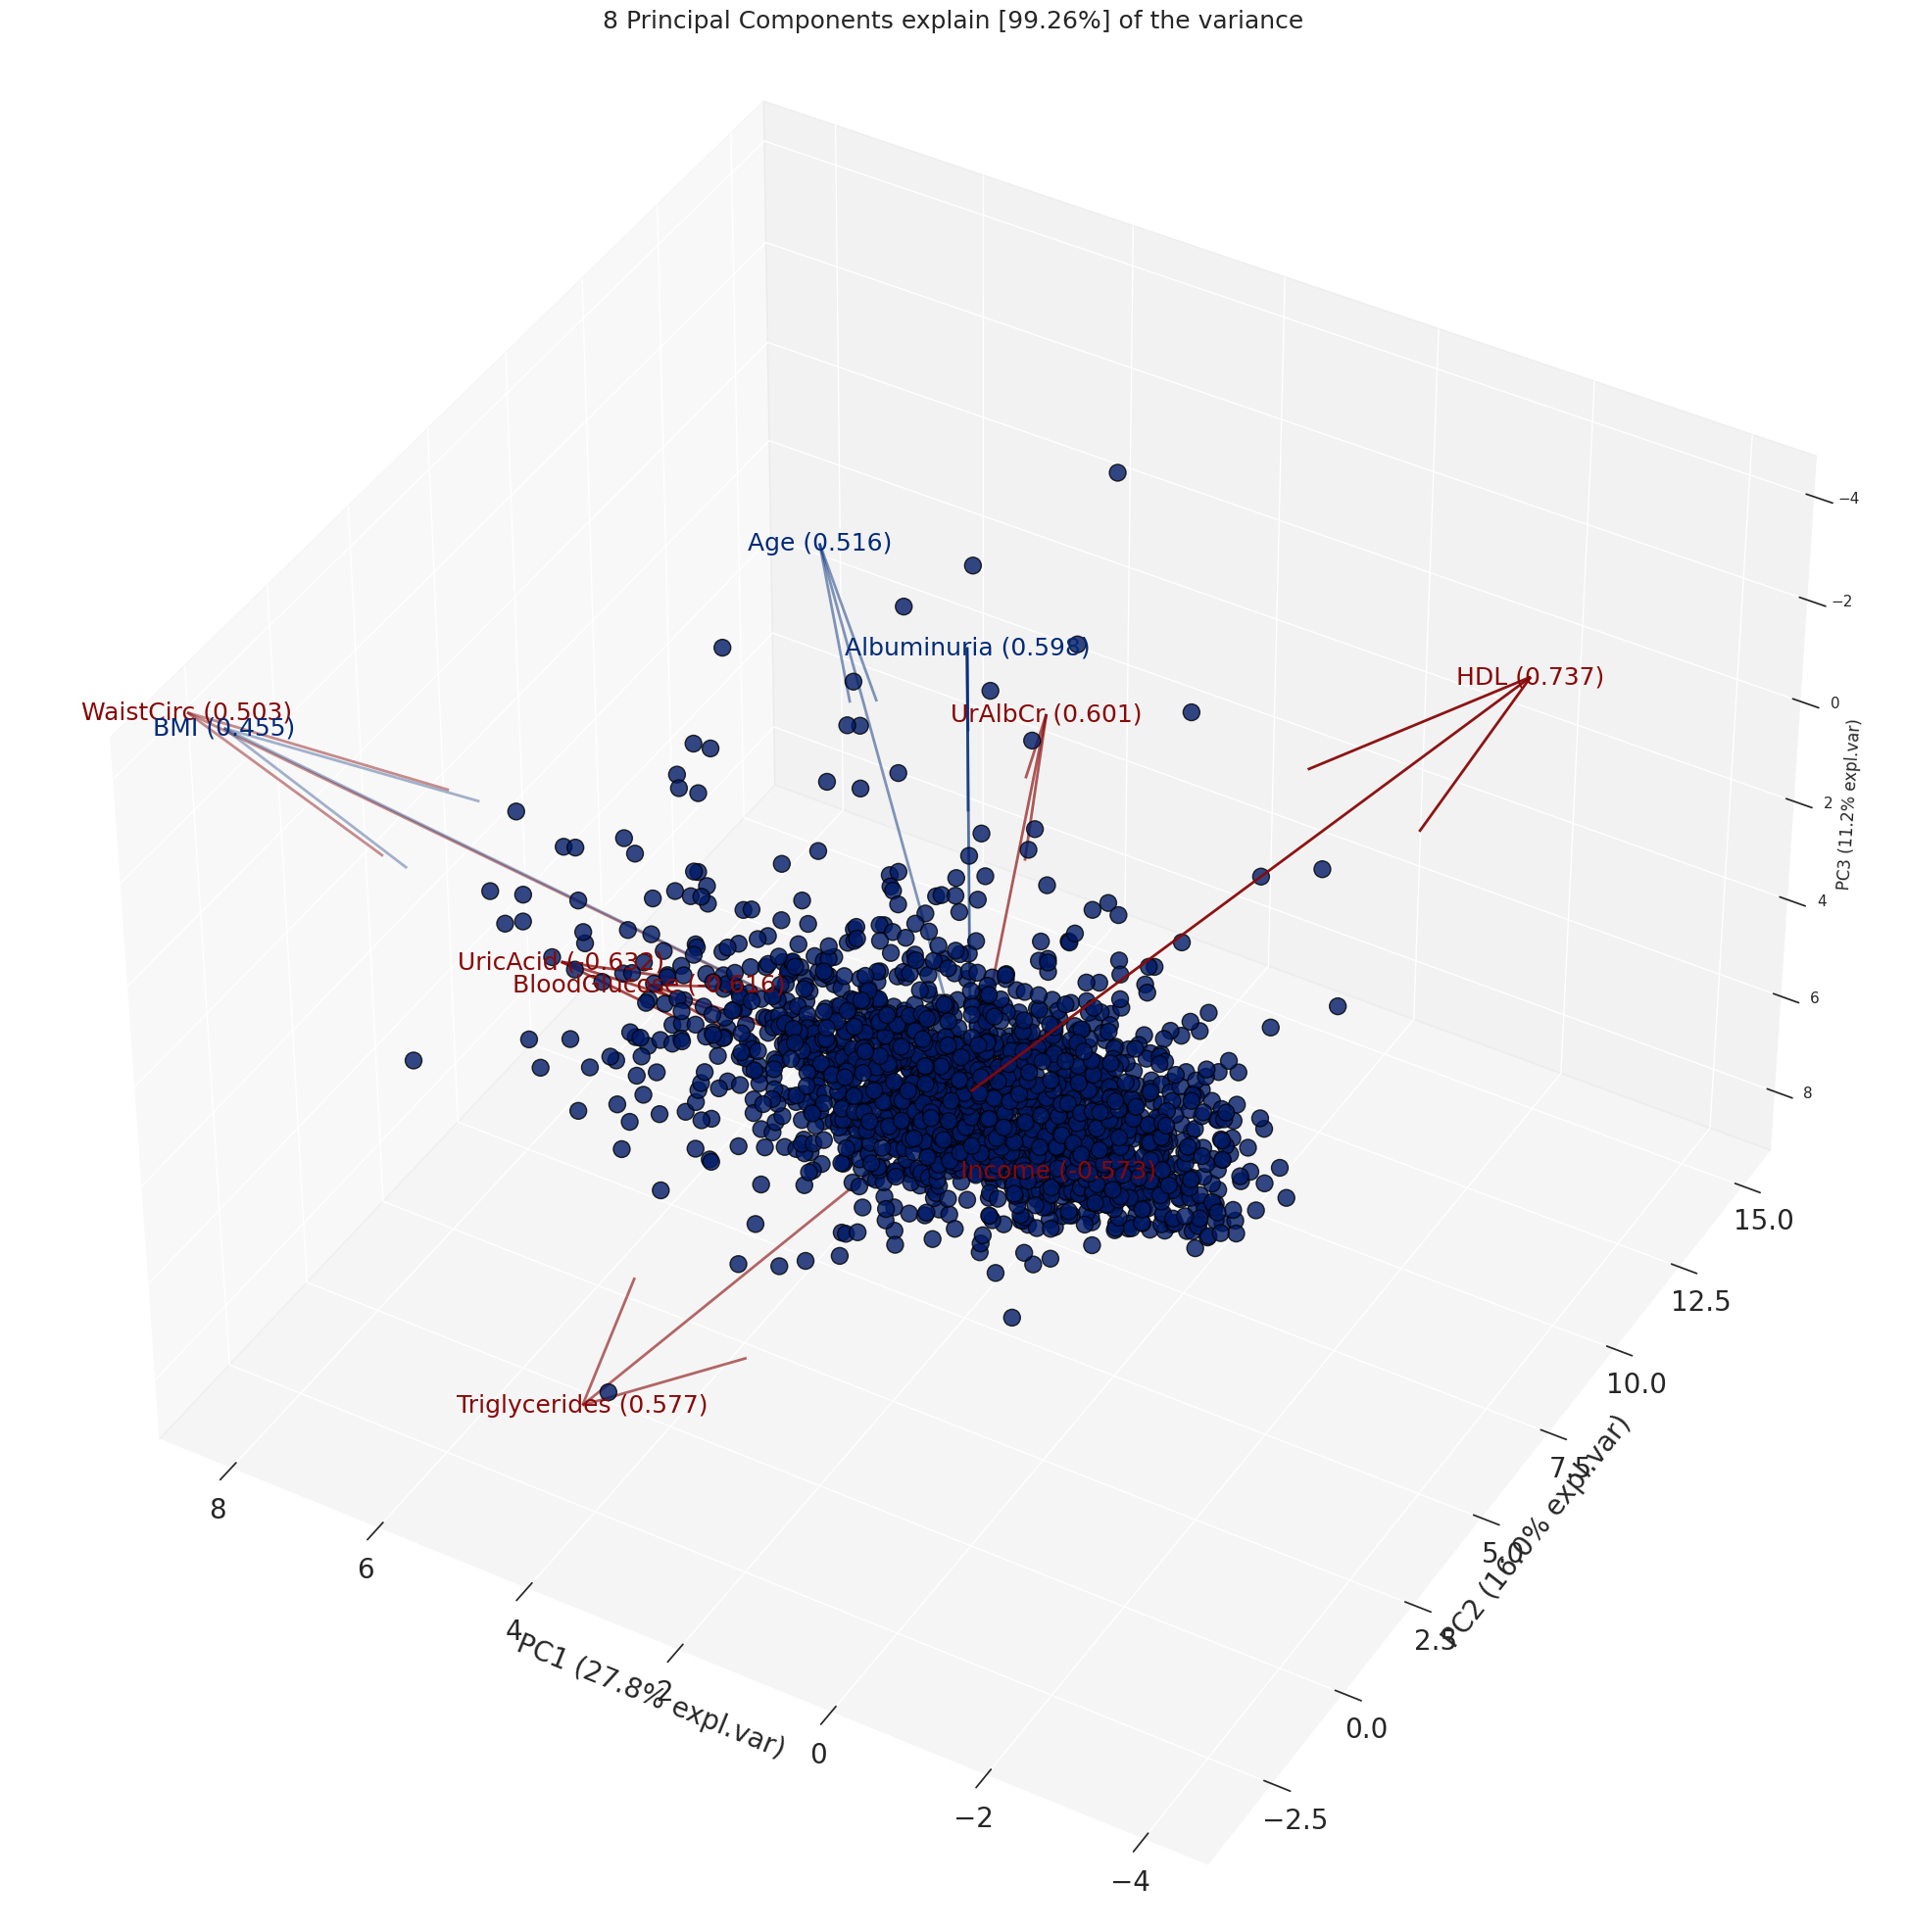

In [138]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found.
Before applying PCA, the output from compare_models() function shows that Light Gradient Boosting Machine, Extreme Gradient Boosting, Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, these models performance decreases and Logistic Regression, Naive Bayes and Quadratic Discriminant Analysis  shows the highest performance. Therefore, I have taken Logistic Regression, Naive Bayes and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [139]:
pip install pycaret[analysis]

  Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [140]:
pip install shap

In [141]:
#Run the below code in your notebook to check the installed version
#from pycaret.utils import version
#version()

In [142]:
#For Google Colab only
#from pycaret.utils import enable_colab

In [143]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2161, 15)
Unseen Data For Predictions: (240, 15)


In [144]:
from pycaret.classification import *
clf = setup(data=data, target='MetabolicSyndrome', train_size=0.7, session_id=123)

**Comparing All Models**

In [145]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [146]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

**Create a Model**

**Logistic Regresssion**

In [147]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [148]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [149]:
tuned_lr

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


In [150]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Naive Bayes**

In [151]:
nb = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model with Naive Bayes**

In [152]:
tuned_nb = tune_model(nb)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [153]:
tuned_nb

GaussianNB(priors=None, var_smoothing=2e-07)

**Evaluate model with Naive Bayes**

In [154]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Quadratic Discriminant Analysis**

In [159]:
qda=create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune QDA Model**

In [160]:
tuned_qda=tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [161]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.57,
                              store_covariance=False, tol=0.0001)

**Evaluate QDA Model**

In [162]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [163]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [164]:
clf_pca = setup(data=data, target='MetabolicSyndrome', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

# **Comparing Models**

In [165]:

!pip install numpy --upgrade

!pip install scipy --upgrade

!pip install pycaret --upgrade

  Using cached numpy-1.26.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
explainerdashboard 0.4.3 requires numpy<=1.24.4, but you have numpy 1.26.2 which is incompatible.
sktime 0.21.1 requires numpy<1.26,>=1.21.0, but you have numpy 1.26.2 which is incompatible.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.
ydata-profiling 4.6.3 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.2 which is inco

In [166]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Best model with PCA**

In [167]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Tune Best Model**

In [168]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Best Model**

In [169]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [170]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [171]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# **Evaluate Model**

In [172]:
tuned_lr_pca

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create Naive Bayes Model**

In [174]:
nb_pca = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [175]:
tuned_nb_pca = tune_model(nb_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [176]:
tuned_nb_pca

GaussianNB(priors=None, var_smoothing=1e-09)

# **Evaluate Model Naive Bayes**

In [177]:
evaluate_model(tuned_nb_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create Quadratic Discriminant Analysis Model**

In [180]:
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune model**

In [181]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# **Evaluate Model**

In [182]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.66,
                              store_covariance=False, tol=0.0001)

In [183]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [184]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [185]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [186]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_samples_leaf=5,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     n_estimators=150, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [187]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [188]:
!pip install shap

In [189]:
import shap

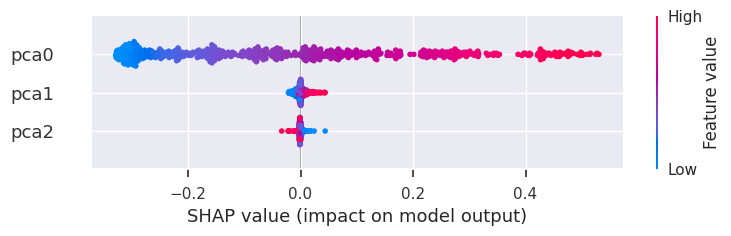

In [190]:
interpret_model(tuned_et_pca, plot='summary')


In [191]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [192]:
interpret_model(tuned_et_pca, plot='reason')